# How it works

The score for Timer Score is calculated using an inverted, adjusting, sigmoid function, which is common in AI and text classifiers.  The score approaches 1 as the duration beats the target by a wider margin.  The score approaches 0 as the duration exceeds the target by more and more.

Wikipedia defines sigmoid functions like this, "a sigmoid function is a bounded, differentiable, real function that is defined for all real input values and has a non-negative derivative at each point and exactly one inflection point." (https://en.wikipedia.org/wiki/Sigmoid_function).  The inflection point is when the the curve switches from convex to concave and the output of the function crosses a horizontal mid-point.

The following is the sigmoid function used in the Timer Score library.  x is the value for which we wish to calculate a score.  k impacts the scope of the line around the inflection point.  For smaller targets, we need a more aggresive slope to get variation in the score.  The target defines the inflection point when values go from < 0.5 to > 0.5.

In [1]:
import numpy as np

def sigmoid(x, k, target):
    return 1 - (1 / (1 + np.exp(-k * (x - target))))

Here's a typical example.

In [2]:
sigmoid(0.1, 3, 1)

0.9370266439430035

The following analysis function allows us to plot various samples of k.  We use the numpy linspace funcion to create the values that are plotted.

In [9]:
import matplotlib.pyplot as plt

def analysis(target, k):
    x_values = np.linspace(target-10, target+10, 100)
    sigmoid_values = sigmoid(x_values, k, target)
    plt.plot(x_values, sigmoid_values)
    plt.axvline(x=target, color='r', linestyle='--', label=f'Crossing Point ({target}, {sigmoid(target, k, target):.2f})')
    plt.xlabel('x')
    plt.ylabel('sigmoid(x)')
    plt.title('Sigmoid Function Crossing at x')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"Target: {target}")
    print(f"Average score -- value: {target}, score: {sigmoid(target, k, target)}")
    value = target * 0.8
    print(f"Above average -- value: {value}, score: {sigmoid(value, k, target)}")
    value = target * 1.2
    print(f"Below average -- value: {value}, score: {sigmoid(value, k, target)}")
    value = target + 3
    print(f"Bad score -- value: {value}, score: {sigmoid(value, k, target)}")

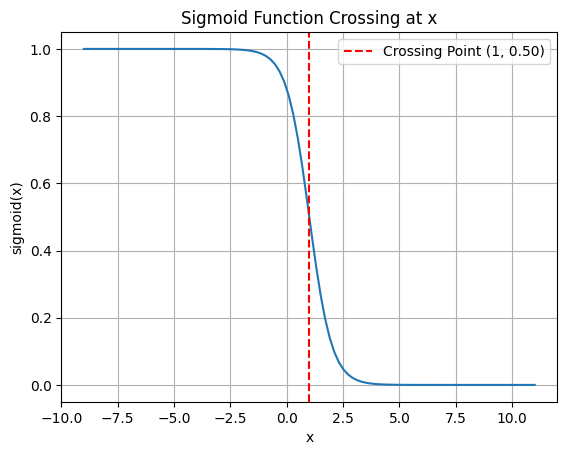

Target: 1
Average score -- value: 1, score: 0.5
Above average -- value: 0.8, score: 0.598687660112452
Below average -- value: 1.2, score: 0.401312339887548
Bad score -- value: 4, score: 0.002472623156634657


In [10]:
target = 1
k = 2
analysis(target, k)

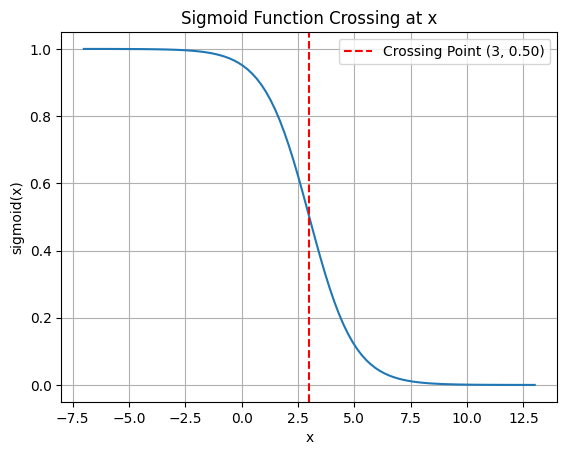

Target: 3
Average score -- value: 3, score: 0.5
Above average -- value: 2.4000000000000004, score: 0.6456563062257954
Below average -- value: 3.5999999999999996, score: 0.3543436937742046
Bad score -- value: 6, score: 0.047425873177566635


In [11]:
target = 3
k = 1
analysis(target, k)

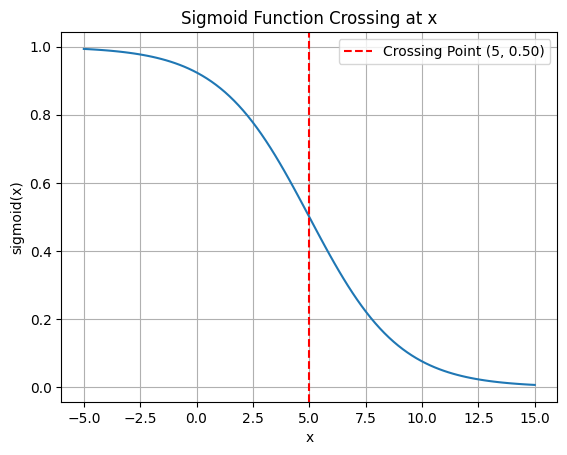

Target: 5
Average score -- value: 5, score: 0.5
Above average -- value: 4.0, score: 0.6224593312018546
Below average -- value: 6.0, score: 0.3775406687981454
Bad score -- value: 8, score: 0.18242552380635635


In [12]:
target = 5
k = 0.5
analysis(target, k)